### Libraries 

In [ ]:
pip install json_lines

In [ ]:
import json_lines 
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import pandas
import pandas as pd
import numpy as np
from sklearn import metrics, svm
import seaborn as sn
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
%matplotlib inline

### Data Processing and Cleaning 

In [ ]:
X=[]; y=[]; z=[]
with open('reviews_111.jl', 'rb') as f: 
  for item in json_lines.reader(f):
    X.append(item['text']) 
    y.append(item['voted_up']) 
    z.append(item['early_access'])

In [ ]:
data = {'Review': X, 'Voted_Up': y, 'Early_Access':z}
df = pandas.DataFrame(data=data)
print(df)

                                                 Review  Voted_Up  Early_Access
0     Единственная серия игр в которой мне понравили...      True         False
1                                      kruta vashe imba      True         False
2                            Je recommande fortement =)      True         False
3     W chuj dobra grafika nie porównywalna do call ...      True         False
4                                     Świetna gra!!! :)      True         False
...                                                 ...       ...           ...
4995  In Racer 8 geht es schlicht und einfach darum ...     False         False
4996                          Странная игра не советую!     False         False
4997  It's super lame. Thankfully it was on sale, bu...     False         False
4998  It's a fidget spinner game. You, uh, spin the ...     False         False
4999  Even though the gameplay is clunky as hell, I ...     False          True

[5000 rows x 3 columns]


In [ ]:
def cleaning(text):
  text=text.lower()
  text=re.sub('\[.*?\],!','', text)
  text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
  text=re.sub('\w*\d\w*','',text)
  return text

cleaned = lambda x: cleaning(x)

In [ ]:
df['Review']=pandas.DataFrame(df.Review.apply(cleaned))
X=np.array(df.Review)
y=np.array(df.Voted_Up)
z=np.array(df.Early_Access)
print(df)

                                                 Review  Voted_Up  Early_Access
0     единственная серия игр в которой мне понравили...      True         False
1                                      kruta vashe imba      True         False
2                              je recommande fortement       True         False
3     w chuj dobra grafika nie porównywalna do call ...      True         False
4                                          świetna gra       True         False
...                                                 ...       ...           ...
4995  in racer  geht es schlicht und einfach darum e...     False         False
4996                           странная игра не советую     False         False
4997  its super lame thankfully it was on sale but t...     False         False
4998  its a fidget spinner game you uh spin the thin...     False         False
4999  even though the gameplay is clunky as hell i s...     False          True

[5000 rows x 3 columns]


### Data Visualisation 

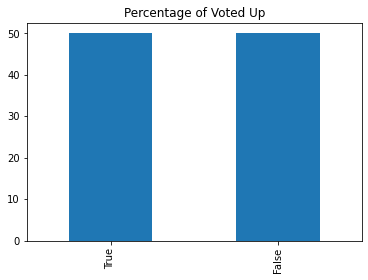

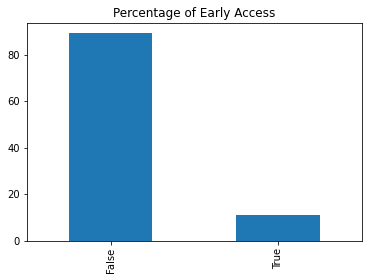

In [ ]:
round(df.Voted_Up.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title("Percentage of Voted Up")
plt.show()

round(df.Early_Access.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title("Percentage of Early Access")
plt.show()

In [ ]:
cleaned_reviews=df.Review
voted_up=df.Voted_Up
early=df.Early_Access

re_train,re_test,vo_train,vo_test,ea_train,ea_test = train_test_split(cleaned_reviews,voted_up,early,test_size=0.25,random_state=255)

print("re_train: ",len(re_train))
print("re_test: ",len(re_test))
print("vo_train: ",len(vo_train))
print("vo_test: ",len(vo_test))
print("ea_train: ",len(ea_train))
print("ea_test: ",len(ea_test))

re_train:  3750
re_test:  1250
vo_train:  3750
vo_test:  1250
ea_train:  3750
ea_test:  1250


### Logistic Regression With Cross Validation For Question 1.1 and 1.2

Predicted  False  True 
Actual                 
False        465    166
True         150    469

Accuracy:  0.7472
Precision:  0.7474241905127713
Recall:  0.7472
F1 Score:  0.7480063795853269

Review:'worst game'.  Vote Up Result: False
Review:'happy with this game'.  Vote Up Result: True 



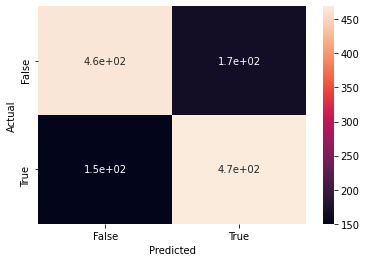

In [ ]:
tvec= TfidfVectorizer()
clf1= LogisticRegression(C=10, max_iter=500)
logic_1= Pipeline([('vectorizer',tvec),('classifier',clf1)])
logic_1.fit(re_train,vo_train)

predictions= logic_1.predict(re_test)

confusion_matrix = pd.crosstab(vo_test,predictions, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)

print("\nAccuracy: ", accuracy_score(vo_test,predictions))
print("Precision: ", precision_score(vo_test,predictions, average= 'weighted'))
print("Recall: ", recall_score(vo_test,predictions,average= 'weighted'))
print("F1 Score: ", f1_score(vo_test,predictions))
#print("Mean Square Error: ", mean_squared_error(vo_test,predictions))

sample=['worst game','happy with this game']
example=logic_1.predict(sample)

print("\nReview:'worst game'.  Vote Up Result:",example[0])
print("Review:'happy with this game'.  Vote Up Result:",example[1],'\n')
plt.show()

In [ ]:
importance = clf1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

when C = 0.1 Mean Accuracy = 0.2732 Std = 0.051343548767104126
when C = 0.5 Mean Accuracy = 0.49420000000000003 Std = 0.05056836956042779
when C = 1 Mean Accuracy = 0.5586 Std = 0.04884301383002485
when C = 5 Mean Accuracy = 0.6196 Std = 0.040425734377992455
when C = 10 Mean Accuracy = 0.6772 Std = 0.027337885799746824
when C = 50 Mean Accuracy = 0.679 Std = 0.03783384727991589
when C = 100 Mean Accuracy = 0.6804 Std = 0.03838541389642684


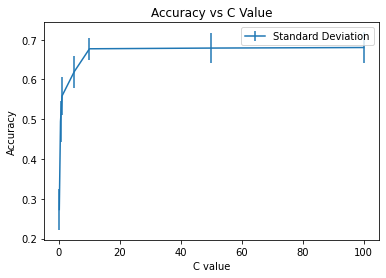

In [ ]:
X=np.array(df.Review)
y=np.array(df.Voted_Up)
mean_array=[]; std_array=[]

Ci_range = [0.1, 0.5, 1, 5, 10, 50, 100]

for Ci in Ci_range:
  #model = LogisticRegression(C=Ci)
  clf1= LogisticRegression(C=Ci,max_iter=500)
  model= Pipeline([('vectorizer',tvec),('classifier',clf1)])
  small_array=[]

  kf = KFold(n_splits=10)

  for train, test in kf.split(X):
    model.fit(X[train], y[train])
    ypred = model.predict(X[test])
    scores = model.score(X[test],y[test])
    small_array.append(scores)

  mean_array.append(np.array(small_array).mean())
  std_array.append(np.array(small_array).std())
  print("when C = "+ str(Ci)+" Mean Accuracy = "+str(np.array(small_array).mean())+" Std = "+str(np.array(small_array).std()))

plt.errorbar(Ci_range,mean_array,yerr= std_array)
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.legend(['Standard Deviation'])
plt.title('Accuracy vs C Value')
plt.show()

Predicted  False  True 
Actual                 
False       1121      4
True         123      2

Accuracy:  0.8984
Precision:  0.8443461950696678
Recall:  0.8984
F1 Score:  0.030534351145038167

Review:'old game'.  Early Access Result: False
Review:'new upcoming game'.  Early Access Result: False 



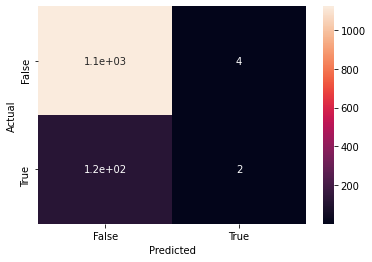

In [ ]:
tvec= TfidfVectorizer()
clf1= LogisticRegression(C=10, max_iter=500)
logic_2= Pipeline([('vectorizer',tvec),('classifier',clf1)])
logic_2.fit(re_train,ea_train)

predictions= logic_2.predict(re_test)

confusion_matrix = pd.crosstab(ea_test,predictions, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)

print("\nAccuracy: ", accuracy_score(ea_test,predictions))
print("Precision: ", precision_score(ea_test,predictions, average= 'weighted'))
print("Recall: ", recall_score(ea_test,predictions,average= 'weighted'))
print("F1 Score: ", f1_score(ea_test,predictions))

sample=['old game','new upcoming game']
example=logic_2.predict(sample)

print("\nReview:'old game'.  Early Access Result:",example[0])
print("Review:'new upcoming game'.  Early Access Result:",example[1],'\n')

plt.show()


when C = 0.1 Mean Accuracy = 0.8914 Std = 0.0253937000061039
when C = 0.5 Mean Accuracy = 0.8914 Std = 0.0253937000061039
when C = 1 Mean Accuracy = 0.8914 Std = 0.0253937000061039
when C = 5 Mean Accuracy = 0.8922000000000001 Std = 0.02565073098373614
when C = 10 Mean Accuracy = 0.8897999999999999 Std = 0.02481048165594536
when C = 50 Mean Accuracy = 0.8799999999999999 Std = 0.024915858403835922
when C = 100 Mean Accuracy = 0.8752000000000001 Std = 0.025584370228715837


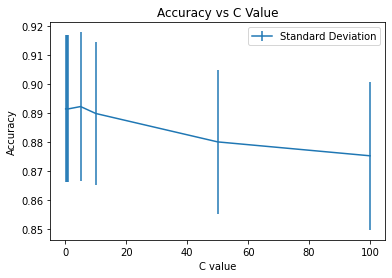

In [ ]:
X=np.array(df.Review)
y=np.array(df.Early_Access)
mean_array=[]; std_array=[]

Ci_range = [0.1, 0.5, 1, 5, 10, 50, 100]

for Ci in Ci_range:
  #model = LogisticRegression(C=Ci)
  clf1= LogisticRegression(C=Ci,max_iter=500)
  model= Pipeline([('vectorizer',tvec),('classifier',clf1)])
  small_array=[]

  kf = KFold(n_splits=10)

  for train, test in kf.split(X):
    model.fit(X[train], y[train])
    ypred = model.predict(X[test])
    scores = model.score(X[test],y[test])
    small_array.append(scores)

  mean_array.append(np.array(small_array).mean())
  std_array.append(np.array(small_array).std())
  print("when C = "+ str(Ci)+" Mean Accuracy = "+str(np.array(small_array).mean())+" Std = "+str(np.array(small_array).std()))

plt.errorbar(Ci_range,mean_array,yerr= std_array)
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.legend(['Standard Deviation'])
plt.title('Accuracy vs C Value')
plt.show()

### KNN With Cross Validation For Question 1.1 and 1.2

Predicted  False  True 
Actual                 
False        356    275
True         286    333

Accuracy:  0.5512
Precision:  0.5511399860632891
Recall:  0.5511999999999999
F1 Score:  0.5427872860635696

Review:'worst game'.  Vote Up Result: True
Review:'happy with this game'.  Vote Up Result: True 



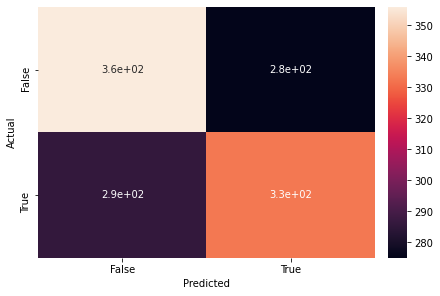

In [ ]:
tvec= TfidfVectorizer()
clf2= KNeighborsClassifier(n_neighbors=4)
kNeighborsClassifier_1=Pipeline([('vectorizer',tvec),('classifier',clf2)])
kNeighborsClassifier_1.fit(re_train,vo_train)
y_pred=kNeighborsClassifier_1.predict(re_test)
confusion_matrix = pd.crosstab(vo_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)
print('\nAccuracy: ',metrics.accuracy_score(vo_test, y_pred))
print("Precision: ", precision_score(vo_test, y_pred, average= 'weighted'))
print("Recall: ", recall_score(vo_test, y_pred,average= 'weighted'))
print("F1 Score: ", f1_score(vo_test, y_pred))

sample=['worst game','happy with this game']
example=kNeighborsClassifier_1.predict(sample)

print("\nReview:'worst game'.  Vote Up Result:",example[0])
print("Review:'happy with this game'.  Vote Up Result:",example[1],'\n')

plt.show()

when n = 2 Mean Accuracy = 0.5356 Std = 0.39870068974106376
when n = 3 Mean Accuracy = 0.5229999999999999 Std = 0.4474480975487548
when n = 4 Mean Accuracy = 0.45920000000000005 Std = 0.1229250177954024
when n = 6 Mean Accuracy = 0.43979999999999997 Std = 0.18279048115260269
when n = 8 Mean Accuracy = 0.4366 Std = 0.22994964666204643
when n = 10 Mean Accuracy = 0.4514 Std = 0.2789954121486588
when n = 20 Mean Accuracy = 0.44400000000000006 Std = 0.3717429219232022
when n = 50 Mean Accuracy = 0.4816 Std = 0.4741137416274706
when n = 100 Mean Accuracy = 0.4974 Std = 0.49740289504585716
when n = 200 Mean Accuracy = 0.354 Std = 0.348003448258778
when n = 500 Mean Accuracy = 0.19799999999999998 Std = 0.04235091498421256


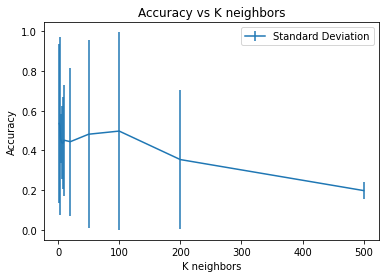

In [ ]:
X=np.array(df.Review)
y=np.array(df.Voted_Up)
mean_array=[]; std_array=[]

N = [2,3,4,6,8,10,20,50,100,200,500]

for n in N:

  clf2= KNeighborsClassifier(n_neighbors=n)
  model= Pipeline([('vectorizer',tvec),('classifier',clf2)])
  small_array=[]

  kf = KFold(n_splits=10)

  for train, test in kf.split(X):
    model.fit(X[train], y[train])
    ypred = model.predict(X[test])
    scores = model.score(X[test],y[test])
    small_array.append(scores)

  mean_array.append(np.array(small_array).mean())
  std_array.append(np.array(small_array).std())
  print("when n = "+ str(n)+" Mean Accuracy = "+str(np.array(small_array).mean())+" Std = "+str(np.array(small_array).std()))

plt.errorbar(N,mean_array,yerr= std_array)
plt.xlabel('K neighbors')
plt.ylabel('Accuracy')
plt.legend(['Standard Deviation'])
plt.title('Accuracy vs K neighbours')
plt.show()

Predicted  False  True 
Actual                 
False       1120      5
True         124      1

Accuracy:  0.8968
Precision:  0.8269560557341907
Recall:  0.8968
F1 Score:  0.015267175572519083

Review:'old game'.  Early Access Result: False
Review:'new upcoming game'.  Early Access Result: False 



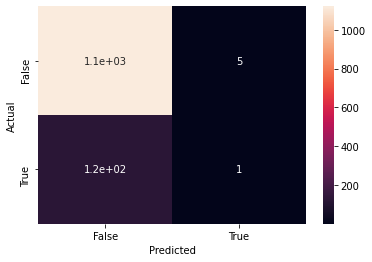

In [ ]:
tvec= TfidfVectorizer()
clf2= KNeighborsClassifier(n_neighbors=4)
kNeighborsClassifier_2=Pipeline([('vectorizer',tvec),('classifier',clf2)])
kNeighborsClassifier_2.fit(re_train,ea_train)
y_pred=kNeighborsClassifier_2.predict(re_test)
confusion_matrix = pd.crosstab(ea_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)
print('\nAccuracy: ',accuracy_score(ea_test, y_pred))
print("Precision: ", precision_score(ea_test, y_pred, average= 'weighted'))
print("Recall: ", recall_score(ea_test, y_pred,average= 'weighted'))
print("F1 Score: ", f1_score(ea_test, y_pred))

sample=['old game','new upcoming game']
example=kNeighborsClassifier_2.predict(sample)

print("\nReview:'old game'.  Early Access Result:",example[0])
print("Review:'new upcoming game'.  Early Access Result:",example[1],'\n')
plt.show()

when n = 2 Mean Accuracy = 0.8904 Std = 0.025531157435572736
when n = 4 Mean Accuracy = 0.8896000000000001 Std = 0.024426215425235258
when n = 6 Mean Accuracy = 0.8911999999999999 Std = 0.0250790749430676
when n = 8 Mean Accuracy = 0.8914 Std = 0.0253937000061039
when n = 10 Mean Accuracy = 0.8914 Std = 0.0253937000061039
when n = 20 Mean Accuracy = 0.8914 Std = 0.0253937000061039
when n = 50 Mean Accuracy = 0.8914 Std = 0.0253937000061039
when n = 100 Mean Accuracy = 0.8914 Std = 0.0253937000061039
when n = 200 Mean Accuracy = 0.8914 Std = 0.0253937000061039
when n = 500 Mean Accuracy = 0.8914 Std = 0.0253937000061039


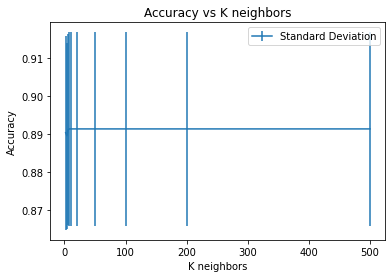

In [ ]:
X=np.array(df.Review)
y=np.array(df.Early_Access)
mean_array=[]; std_array=[]

N = [2,4,6,8,10,20,50,100,200,500]

for n in N:

  clf2= KNeighborsClassifier(n_neighbors=n)
  model= Pipeline([('vectorizer',tvec),('classifier',clf2)])
  small_array=[]

  kf = KFold(n_splits=10)

  for train, test in kf.split(X):
    model.fit(X[train], y[train])
    ypred = model.predict(X[test])
    scores = model.score(X[test],y[test])
    small_array.append(scores)

  mean_array.append(np.array(small_array).mean())
  std_array.append(np.array(small_array).std())
  print("when n = "+ str(n)+" Mean Accuracy = "+str(np.array(small_array).mean())+" Std = "+str(np.array(small_array).std()))

plt.errorbar(N,mean_array,yerr= std_array)
plt.xlabel('K neighbors')
plt.ylabel('Accuracy')
plt.legend(['Standard Deviation'])
plt.title('Accuracy vs K neighbors')
plt.show()

### SVM With Cross Validation For Question 1.1 and 1.2


Predicted  False  True 
Actual                 
False        471    160
True         153    466

Accuracy:  0.7496
Precision:  0.7496582329810765
Recall:  0.7496
F1 Score:  0.7485943775100402

Review:'worst game'.  Vote Up Result: False
Review:'happy with this game'.  Vote Up Result: True 



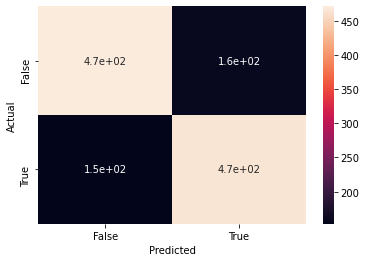

In [ ]:
tvec= TfidfVectorizer()
clf3 = svm.SVC(kernel='linear',C = 1)
svm_1=Pipeline([('vectorizer',tvec),('classifier',clf3)])
svm_1.fit(re_train,vo_train)
y_pred=svm_1.predict(re_test)
confusion_matrix = pd.crosstab(vo_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)
print('\nAccuracy: ', accuracy_score(vo_test, y_pred))
print("Precision: ", precision_score(vo_test, y_pred, average= 'weighted'))
print("Recall: ", recall_score(vo_test, y_pred,average= 'weighted'))
print("F1 Score: ", f1_score(vo_test, y_pred))

sample=['worst game','happy with this game']
example=svm_1.predict(sample)

print("\nReview:'worst game'.  Vote Up Result:",example[0])
print("Review:'happy with this game'.  Vote Up Result:",example[1],'\n')

plt.show()

when C = 0.1 Mean Accuracy = 0.185 Std = 0.04741518744031283
when C = 0.5 Mean Accuracy = 0.5149999999999999 Std = 0.05167784825241856
when C = 1 Mean Accuracy = 0.6182 Std = 0.04185164273956282
when C = 5 Mean Accuracy = 0.6826000000000001 Std = 0.045095897817872516
when C = 10 Mean Accuracy = 0.6726 Std = 0.052794317876074505
when C = 50 Mean Accuracy = 0.6706 Std = 0.08949659211389002
when C = 100 Mean Accuracy = 0.6756 Std = 0.09505703551026617


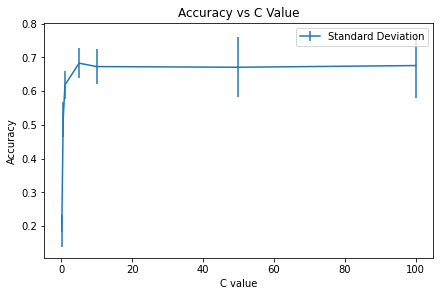

In [ ]:
X=np.array(df.Review)
y=np.array(df.Voted_Up)
mean_array=[]; std_array=[]

Ci_range = [0.1, 0.5, 1, 5, 10, 50, 100]

for Ci in Ci_range:
  #model = LogisticRegression(C=Ci)
  clf3 = svm.SVC(kernel='linear',C = Ci)
  model= Pipeline([('vectorizer',tvec),('classifier',clf3)])
  small_array=[]

  kf = KFold(n_splits=10)

  for train, test in kf.split(X):
    model.fit(X[train], y[train])
    ypred = model.predict(X[test])
    scores = model.score(X[test],y[test])
    small_array.append(scores)

  mean_array.append(np.array(small_array).mean())
  std_array.append(np.array(small_array).std())
  print("when C = "+ str(Ci)+" Mean Accuracy = "+str(np.array(small_array).mean())+" Std = "+str(np.array(small_array).std()))

plt.errorbar(Ci_range,mean_array,yerr= std_array)
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.legend(['Standard Deviation'])
plt.title('Accuracy vs C Value')
plt.show()

Predicted  False  True 
Actual                 
False       1091     34
True         114     11

Accuracy:  0.8816
Precision:  0.8392992162286768
Recall:  0.8816
F1 Score:  0.12941176470588234

Review:'old game'.  Early Access Result: False
Review:'new upcoming game'.  Early Access Result: False 



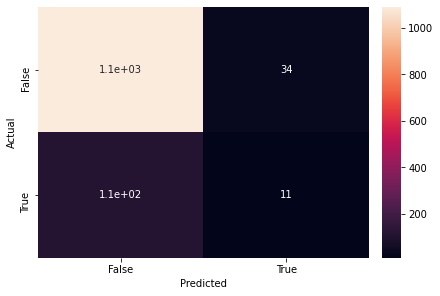

In [ ]:
tvec= TfidfVectorizer()
clf3 = svm.SVC(kernel='linear',C =10)
svm_2=Pipeline([('vectorizer',tvec),('classifier',clf3)])
svm_2.fit(re_train,ea_train)
y_pred=svm_2.predict(re_test)
confusion_matrix = pd.crosstab(ea_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)
print('\nAccuracy: ',accuracy_score(ea_test, y_pred))
print("Precision: ", precision_score(ea_test, y_pred, average= 'weighted'))
print("Recall: ", recall_score(ea_test, y_pred,average= 'weighted'))
print("F1 Score: ", f1_score(ea_test, y_pred))

sample=['old game','new upcoming game']
example=svm_2.predict(sample)

print("\nReview:'old game'.  Early Access Result:",example[0])
print("Review:'new upcoming game'.  Early Access Result:",example[1],'\n')
plt.show()

when C = 0.1 Mean Accuracy = 0.8914 Std = 0.0253937000061039
when C = 0.5 Mean Accuracy = 0.8914 Std = 0.0253937000061039
when C = 1 Mean Accuracy = 0.8924 Std = 0.02582711753177271
when C = 5 Mean Accuracy = 0.8766 Std = 0.02493270943960967
when C = 10 Mean Accuracy = 0.8672000000000001 Std = 0.023292917378465092
when C = 50 Mean Accuracy = 0.8576 Std = 0.0242619042945932
when C = 100 Mean Accuracy = 0.8554 Std = 0.021964516839666673


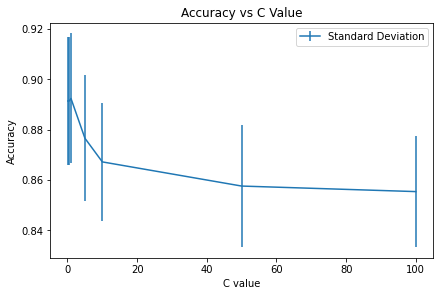

In [ ]:
X=np.array(df.Review)
y=np.array(df.Early_Access)
mean_array=[]; std_array=[]

Ci_range = [0.1, 0.5, 1, 5, 10, 50, 100]

for Ci in Ci_range:
  #model = LogisticRegression(C=Ci)
  clf3 = svm.SVC(kernel='linear',C = Ci)
  model= Pipeline([('vectorizer',tvec),('classifier',clf3)])
  small_array=[]

  kf = KFold(n_splits=10)

  for train, test in kf.split(X):
    model.fit(X[train], y[train])
    ypred = model.predict(X[test])
    scores = model.score(X[test],y[test])
    small_array.append(scores)

  mean_array.append(np.array(small_array).mean())
  std_array.append(np.array(small_array).std())
  print("when C = "+ str(Ci)+" Mean Accuracy = "+str(np.array(small_array).mean())+" Std = "+str(np.array(small_array).std()))

plt.errorbar(Ci_range,mean_array,yerr= std_array)
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.legend(['Standard Deviation'])
plt.title('Accuracy vs C Value')
plt.show()

### ROC Curve For Question 1.1 and Question 1.2

In [ ]:
def baseline_model(X):
  print(np.ones(X.shape[0]))
  return np.ones(X.shape[0])

baseline_y_pred = baseline_model(re_test)

[1. 1. 1. ... 1. 1. 1.]


[1. 1. 1. ... 1. 1. 1.]
For Baseline Model: Number of True Negatives:  0  False Positives:  631  False Negatives:  0  True Positives :  619

For Logistic Regression: Number of True Negatives:  465  False Positives:  166  False Negatives:  150  True Positives :  469

For Knn: Number of True Negatives:  356  False Positives:  275  False Negatives:  286  True Positives :  333

For SVM: Number of True Negatives:  471  False Positives:  160  False Negatives:  153  True Positives :  466 



Text(0.5, 1.0, 'Roc Curve')

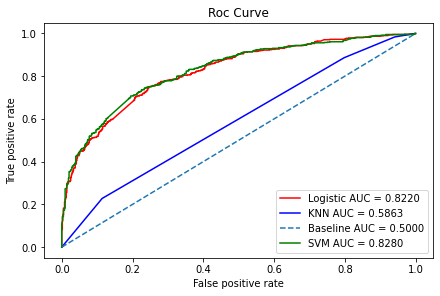

In [ ]:
from sklearn.metrics import roc_curve,auc

Logi_y_pred = logic_1.predict(re_test)
Knn_y_pred = kNeighborsClassifier_1.predict(re_test)
svm_y_pred = svm_1.predict(re_test)
baseline_y_pred = baseline_model(re_test)

confusion_matrix2 = confusion_matrix(vo_test,Knn_y_pred)
confusion_matrix3 = confusion_matrix(vo_test,baseline_y_pred)
confusion_matrix1 = confusion_matrix(vo_test,Logi_y_pred)
confusion_matrix4 = confusion_matrix(vo_test,svm_y_pred)

tn, fp, fn, tp = confusion_matrix3.ravel()
print('For Baseline Model: Number of True Negatives: ',tn,' False Positives: ',fp,' False Negatives: ',fn,' True Positives : ',tp)
tn1, fp1, fn1, tp1 = confusion_matrix1.ravel()
print('\nFor Logistic Regression: Number of True Negatives: ',tn1,' False Positives: ',fp1,' False Negatives: ',fn1,' True Positives : ',tp1)
tn2, fp2, fn2, tp2 = confusion_matrix2.ravel()
print('\nFor Knn: Number of True Negatives: ',tn2,' False Positives: ',fp2,' False Negatives: ',fn2,' True Positives : ',tp2)
tn2, fp2, fn2, tp2 = confusion_matrix4.ravel()
print('\nFor SVM: Number of True Negatives: ',tn2,' False Positives: ',fp2,' False Negatives: ',fn2,' True Positives : ',tp2,'\n')


False_Positive_rate,True_Positive_rate,_ = roc_curve(vo_test,logic_1.decision_function(re_test))
False_Positive_rate2,True_Positive_rate2,_ = roc_curve(vo_test,kNeighborsClassifier_1.predict_proba(re_test)[:,1])
False_Positive_rate3,True_Positive_rate3,_ = roc_curve(vo_test,baseline_y_pred)
False_Positive_rate4,True_Positive_rate4,_ = roc_curve(vo_test,svm_1.decision_function(re_test))

roc_auc = auc(False_Positive_rate, True_Positive_rate)
roc_auc2 = auc(False_Positive_rate2, True_Positive_rate2)
roc_auc3 = auc(False_Positive_rate3, True_Positive_rate3)
roc_auc4 = auc(False_Positive_rate4, True_Positive_rate4)

plt.plot(False_Positive_rate,True_Positive_rate,'r', label = 'Logistic AUC = %0.4f' % roc_auc)
plt.plot(False_Positive_rate2,True_Positive_rate2,'b', label = 'KNN AUC = %0.4f' % roc_auc2)
plt.plot(False_Positive_rate3,True_Positive_rate3,linestyle='--',label = 'Baseline AUC = %0.4f' % roc_auc3)
plt.plot(False_Positive_rate4,True_Positive_rate4,'g', label = 'SVM AUC = %0.4f' % roc_auc4)
plt.legend(loc = 'lower right')
plt.rc('font', size=10); plt.rcParams['figure.constrained_layout.use'] = True
plt.xlabel('False positive rate') 
plt.ylabel('True positive rate') 
# plt.legend(['Logistic Regression','KNN Classifier', 'Baseline Model'])
plt.title('Roc Curve')

[1. 1. 1. ... 1. 1. 1.]
For Baseline Model: Number of True Negatives:  0  False Positives:  1125  False Negatives:  0  True Positives :  125

For Logistic Regression: Number of True Negatives:  1121  False Positives:  4  False Negatives:  123  True Positives :  2

For Knn: Number of True Negatives:  1120  False Positives:  5  False Negatives:  124  True Positives :  1

For SVM: Number of True Negatives:  1091  False Positives:  34  False Negatives:  114  True Positives :  11 



Text(0.5, 1.0, 'Roc Curve')

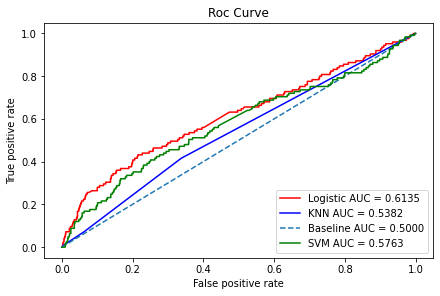

In [ ]:
from sklearn.metrics import roc_curve,auc

Logi_y_pred = logic_2.predict(re_test)
Knn_y_pred = kNeighborsClassifier_2.predict(re_test)
svm_y_pred = svm_2.predict(re_test)
baseline_y_pred = baseline_model(re_test)

confusion_matrix2 = confusion_matrix(ea_test,Knn_y_pred)
confusion_matrix3 = confusion_matrix(ea_test,baseline_y_pred)
confusion_matrix1 = confusion_matrix(ea_test,Logi_y_pred)
confusion_matrix4 = confusion_matrix(ea_test,svm_y_pred)

tn, fp, fn, tp = confusion_matrix3.ravel()
print('For Baseline Model: Number of True Negatives: ',tn,' False Positives: ',fp,' False Negatives: ',fn,' True Positives : ',tp)
tn1, fp1, fn1, tp1 = confusion_matrix1.ravel()
print('\nFor Logistic Regression: Number of True Negatives: ',tn1,' False Positives: ',fp1,' False Negatives: ',fn1,' True Positives : ',tp1)
tn2, fp2, fn2, tp2 = confusion_matrix2.ravel()
print('\nFor Knn: Number of True Negatives: ',tn2,' False Positives: ',fp2,' False Negatives: ',fn2,' True Positives : ',tp2)
tn2, fp2, fn2, tp2 = confusion_matrix4.ravel()
print('\nFor SVM: Number of True Negatives: ',tn2,' False Positives: ',fp2,' False Negatives: ',fn2,' True Positives : ',tp2,'\n')


False_Positive_rate,True_Positive_rate,_ = roc_curve(ea_test,logic_2.decision_function(re_test))
False_Positive_rate2,True_Positive_rate2,_ = roc_curve(ea_test,kNeighborsClassifier_2.predict_proba(re_test)[:,1])
False_Positive_rate3,True_Positive_rate3,_ = roc_curve(ea_test,baseline_y_pred)
False_Positive_rate4,True_Positive_rate4,_ = roc_curve(ea_test,svm_2.decision_function(re_test))

roc_auc = auc(False_Positive_rate, True_Positive_rate)
roc_auc2 = auc(False_Positive_rate2, True_Positive_rate2)
roc_auc3 = auc(False_Positive_rate3, True_Positive_rate3)
roc_auc4 = auc(False_Positive_rate4, True_Positive_rate4)

plt.plot(False_Positive_rate,True_Positive_rate,'r', label = 'Logistic AUC = %0.4f' % roc_auc)
plt.plot(False_Positive_rate2,True_Positive_rate2,'b', label = 'KNN AUC = %0.4f' % roc_auc2)
plt.plot(False_Positive_rate3,True_Positive_rate3,linestyle='--',label = 'Baseline AUC = %0.4f' % roc_auc3)
plt.plot(False_Positive_rate4,True_Positive_rate4,'g', label = 'SVM AUC = %0.4f' % roc_auc4)
plt.legend(loc = 'lower right')
plt.rc('font', size=10); plt.rcParams['figure.constrained_layout.use'] = True
plt.xlabel('False positive rate') 
plt.ylabel('True positive rate') 
# plt.legend(['Logistic Regression','KNN Classifier', 'Baseline Model'])
plt.title('Roc Curve')